In [135]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.mlab as mlab
import pandas as pd
from urllib import request
import scipy as sp
from scipy import stats as stt
from sklearn import datasets, linear_model
from sklearn.neighbors import KernelDensity as kd
from sklearn.linear_model import LinearRegression
from random import randint
from scipy.stats import norm
import statsmodels
import sklearn
import math
import statistics
import sympy as sy
from sympy import symbols, diff
import statsmodels.api as sm
from datetime import date

In [137]:
import os
import pandas as pd
import netCDF4 as nc

os.chdir('/Users/isabe/OneDrive/MATH586_Jupyter/ResearchReport/data')

Eureka = datas + "EurekaNorCal42to25.csv" #1942-2025
SanFrancisco = datas + "SFYearly45to25.csv" #1945-2025
SanDiego = datas + "SDYearly43to25.csv" #1943-2025
EU = pd.read_csv(Eureka)
SF = pd.read_csv(SanFrancisco)
SD = pd.read_csv(SanDiego)


In [139]:
SD
column_names = EU.columns.tolist()
print(column_names)
#Column Names of Importance:
#'PRCP' #54 for SD, 62 for EU and SF
#'TAVG' #60 for SD, 66 for SF, 68 for EU
#'TMAX' #62 for SD, 68 for SF, 70 for EU
#Start all at around 1951

['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'AWND', 'AWND_ATTRIBUTES', 'CDSD', 'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES', 'DP01', 'DP01_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'DP1X', 'DP1X_ATTRIBUTES', 'DSND', 'DSND_ATTRIBUTES', 'DSNW', 'DSNW_ATTRIBUTES', 'DT00', 'DT00_ATTRIBUTES', 'DT32', 'DT32_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES', 'DX70', 'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'DYFG', 'DYFG_ATTRIBUTES', 'DYHF', 'DYHF_ATTRIBUTES', 'DYTS', 'DYTS_ATTRIBUTES', 'EMNT', 'EMNT_ATTRIBUTES', 'EMSD', 'EMSD_ATTRIBUTES', 'EMSN', 'EMSN_ATTRIBUTES', 'EMXP', 'EMXP_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES', 'FZF0', 'FZF0_ATTRIBUTES', 'FZF1', 'FZF1_ATTRIBUTES', 'FZF2', 'FZF2_ATTRIBUTES', 'FZF5', 'FZF5_ATTRIBUTES', 'FZF6', 'FZF6_ATTRIBUTES', 'HDSD', 'HDSD_ATTRIBUTES', 'HTDD', 'HTDD_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'PSUN', 'PSUN_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TSUN', 'TSUN_AT

In [141]:
SF.iloc[:,66]
#SF

0       NaN
1       NaN
2       NaN
3     12.62
4     12.61
      ...  
76    15.25
77    15.01
78    15.35
79    15.04
80      NaN
Name: TAVG, Length: 81, dtype: float64

Getting the important data matrices. Average temperature, Average Max Temperature, and Precipitation totals

In [144]:
EUprcp = EU.iloc[9:83,62].values #1951-2024 Yearly Precipitation Data of Eureka California
EUtavg = EU.iloc[9:83,68].values # 1951-2024 Yearly Temp Avg Data of Eureka California
EUtmax = EU.iloc[9:83,70].values #1951-2024 Yearly Temp Max Data of Eureka California
SFprcp = SF.iloc[6:80,62].values #1951-2024 Yearly Precipitation Data of San Francisco California
SFtavg = SF.iloc[6:80,66].values # 1951-2024 Yearly Temp Avg Data of San Fran California
SFtmax = SF.iloc[6:80,68].values # 1951-2024 Yearly Temp Max Data of San Fran California
SDprcp = SD.iloc[12:86,54].values # 1951-2024 Yearly Precipitation Data of San Diego California
SDtavg = SD.iloc[12:86,60].values # 1951-2024 Yearly Temp Avg Data of San Diego California
SDtmax = SD.iloc[12:86,62].values # 1951-2024 Yearly Temp Max Data of San Diego California

# **Functions for Trends and Trend plots**

### Changes from 1951 to 2024

In [147]:
def TAVG_Trend(data, start, end):
    subset = data[(data['DATE'] >= start) & (data['DATE'] <= end)]

    subset = subset.dropna(subset=['DATE', 'TAVG'])


    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['TAVG'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    slope = model.coef_[0][0]  # Slope of the linear regression model

    return slope

def TMAX_Trend(data, start, end):
    subset = data[(data['DATE'] >= start) & (data['DATE'] <= end)]

    subset = subset.dropna(subset=['DATE', 'TMAX'])


    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['TMAX'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    slope = model.coef_[0][0]  # Slope of the linear regression model

    return slope

def PRCP_Trend(data, start, end):
    subset = data[(data['DATE'] >= start) & (data['DATE'] <= end)]

    subset = subset.dropna(subset=['DATE', 'PRCP'])


    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['PRCP'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    slope = model.coef_[0][0]  # Slope of the linear regression model

    return slope

In [149]:
def TAVG_ltl(data, start_year, end_year, color):
    subset = data[(data['DATE'] >= start_year) & (data['DATE'] <= end_year)]

    subset = subset.dropna(subset=['DATE', 'TAVG'])

    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['TAVG'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    trend_line = model.predict(x)

    slope = model.coef_[0][0]

    plt.plot(subset['DATE'], trend_line, label=f"Linear Trend from "f'{start_year}-{end_year}', color=color, linestyle='-')
    plt.annotate(f"Trend: {slope:.3f}",
             xy=(subset['DATE'].iloc[-1], trend_line[-1]),
             xytext=(-50, 100),
             textcoords='offset points',
             fontsize=10, color=color, fontweight='bold')


def TMAX_ltl(data, start_year, end_year, color):
    subset = data[(data['DATE'] >= start_year) & (data['DATE'] <= end_year)]

    subset = subset.dropna(subset=['DATE', 'TMAX'])

    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['TMAX'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    trend_line = model.predict(x)

    slope = model.coef_[0][0]

    plt.plot(subset['DATE'], trend_line, label=f"Linear Trend from "f'{start_year}-{end_year}', color=color, linestyle='-')
    plt.annotate(f"Trend: {slope:.3f}",
             xy=(subset['DATE'].iloc[-1], trend_line[-1]),
             xytext=(-50, -100),
             textcoords='offset points',
             fontsize=10, color=color, fontweight='bold')

def PRCP_ltl(data, start_year, end_year, color):
    subset = data[(data['DATE'] >= start_year) & (data['DATE'] <= end_year)]

    subset = subset.dropna(subset=['DATE', 'PRCP'])

    x = subset['DATE'].values.reshape(-1, 1)
    y = subset['PRCP'].values.reshape(-1, 1)

    model = LinearRegression().fit(x, y)
    trend_line = model.predict(x)

    slope = model.coef_[0][0]

    plt.plot(subset['DATE'], trend_line, label=f"Linear Trend from "f'{start_year}-{end_year}', color=color, linestyle='-')
    plt.annotate(f"Trend: {slope:.3f}",
             xy=(subset['DATE'].iloc[-1], trend_line[-1]),
             xytext=(-50, 125),
             textcoords='offset points',
             fontsize=10, color=color, fontweight='bold')

# **Yearly Average Temperature**

### Graphs and Trends

In [152]:
SDatrends = {}
SFatrends = {}
EUatrends = {}
for start, end in [(1951, 2024)]:
    SDTavg_Trend = TAVG_Trend(SD, start, end)
    SFTavg_Trend = TAVG_Trend(SF, start, end)
    EUTavg_Trend = TAVG_Trend(EU, start, end)
    SDatrends[f'{start}-{end}'] = SDTavg_Trend
    SFatrends[f'{start}-{end}'] = SFTavg_Trend
    EUatrends[f'{start}-{end}'] = EUTavg_Trend
for period, trend in SDatrends.items():
  print(f'Temporal trend of TAVG in San Diego per decade for {period}: {trend:.4f} °C per year')
for period, trend in SFatrends.items():
  print(f'Temporal trend of TAVG in San Francisco per decade for {period}: {trend:.4f} °C per year')
for period, trend in EUatrends.items():
  print(f'Temporal trend of TAVG in Eureka per decade for {period}: {trend:.4f} °C per year')

Temporal trend of TAVG in San Diego per decade for 1951-2024: 0.0108 °C per year
Temporal trend of TAVG in San Francisco per decade for 1951-2024: 0.0260 °C per year
Temporal trend of TAVG in Eureka per decade for 1951-2024: 0.0098 °C per year


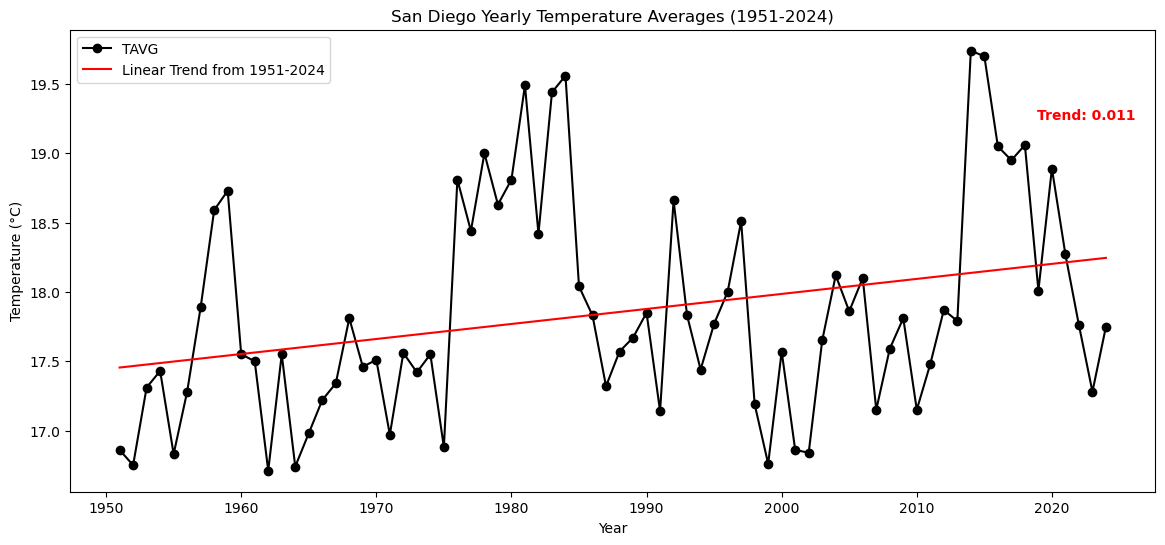

In [154]:
#SD['TAVG'] = pd.to_numeric(SD['AVG'], errors='coerce')
YEARS = np.linspace(1951, 2024, 74)
SDtavg = SDtavg
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SDtavg, 'k-o', label='TAVG')
TAVG_ltl(SD, 1951, 2024, 'red')
plt.title('San Diego Yearly Temperature Averages (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

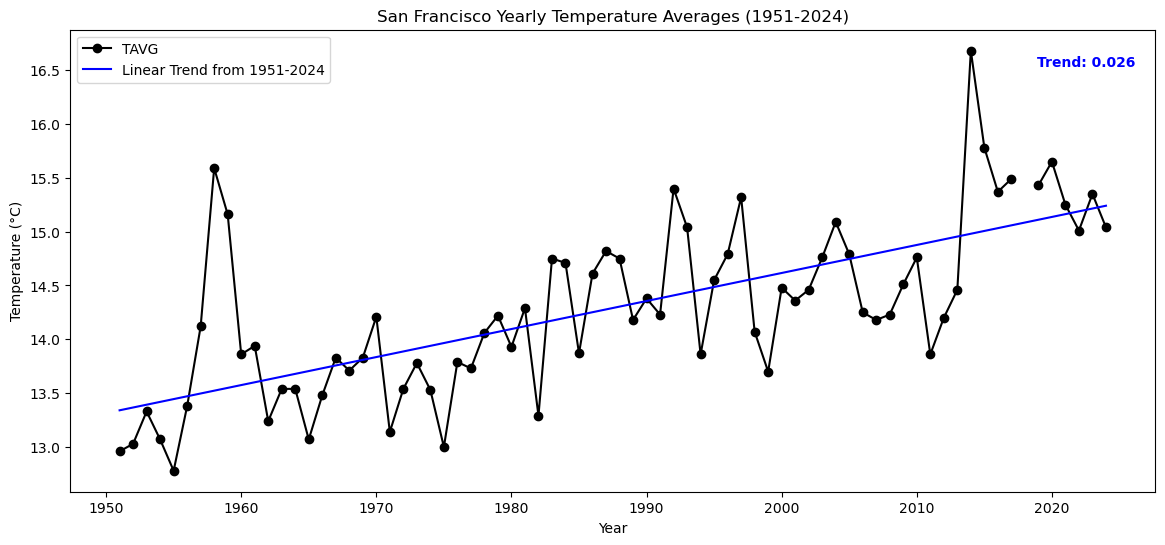

In [156]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SFtavg, 'k-o', label='TAVG')
TAVG_ltl(SF, 1951, 2024, 'blue')
plt.title('San Francisco Yearly Temperature Averages (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

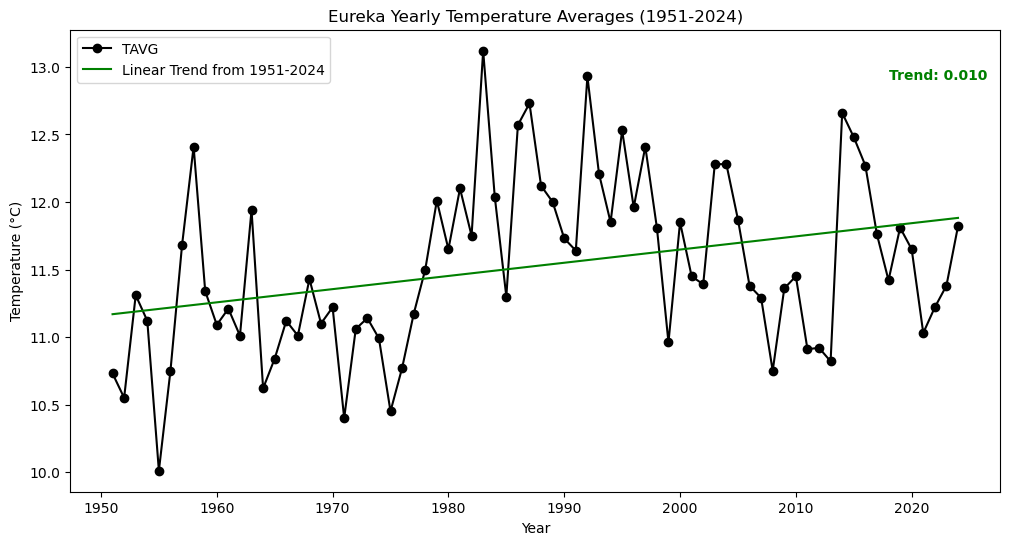

In [158]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(12, 6))
plt.plot(YEARS, EUtavg, 'k-o', label='TAVG')
TAVG_ltl(EU, 1951, 2024, 'green')
plt.title('Eureka Yearly Temperature Averages (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# **Yearly Average MAX Temperature**

### Graphs and Trends

In [161]:
SDmtrends = {}
SFmtrends = {}
EUmtrends = {}
for start, end in [(1951, 2024)]:
    SDTmax_Trend = TMAX_Trend(SD, start, end)
    SFTmax_Trend = TMAX_Trend(SF, start, end)
    EUTmax_Trend = TMAX_Trend(EU, start, end)
    SDmtrends[f'{start}-{end}'] = SDTmax_Trend
    SFmtrends[f'{start}-{end}'] = SFTmax_Trend
    EUmtrends[f'{start}-{end}'] = EUTmax_Trend
for period, trend in SDmtrends.items():
  print(f'Temporal trend of TMAX in San Diego per decade for {period}: {trend:.4f} °C per year')
for period, trend in SFmtrends.items():
  print(f'Temporal trend of TMAX in San Francisco per decade for {period}: {trend:.4f} °C per year')
for period, trend in EUmtrends.items():
  print(f'Temporal trend of TMAX in Eureka per decade for {period}: {trend:.4f} °C per year')

Temporal trend of TMAX in San Diego per decade for 1951-2024: 0.0014 °C per year
Temporal trend of TMAX in San Francisco per decade for 1951-2024: 0.0170 °C per year
Temporal trend of TMAX in Eureka per decade for 1951-2024: 0.0236 °C per year


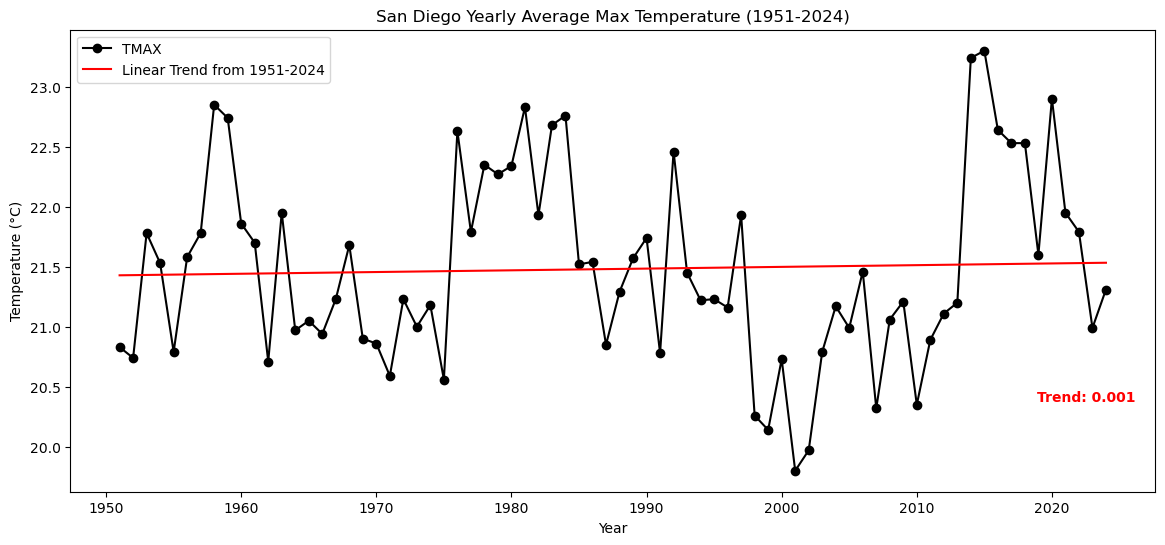

In [163]:
YEARS = np.linspace(1951, 2024, 74)
SDtmax = SDtmax
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SDtmax, 'k-o', label='TMAX')
TMAX_ltl(SD, 1951, 2024, 'red')
plt.title('San Diego Yearly Average Max Temperature (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

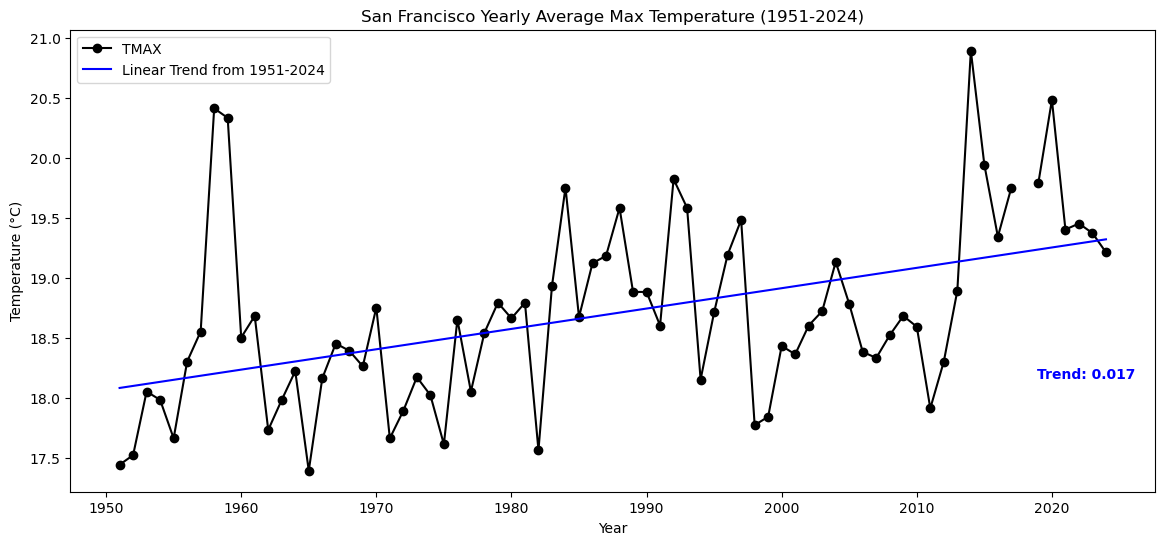

In [165]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SFtmax, 'k-o', label='TMAX')
TMAX_ltl(SF, 1951, 2024, 'blue')
plt.title('San Francisco Yearly Average Max Temperature (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

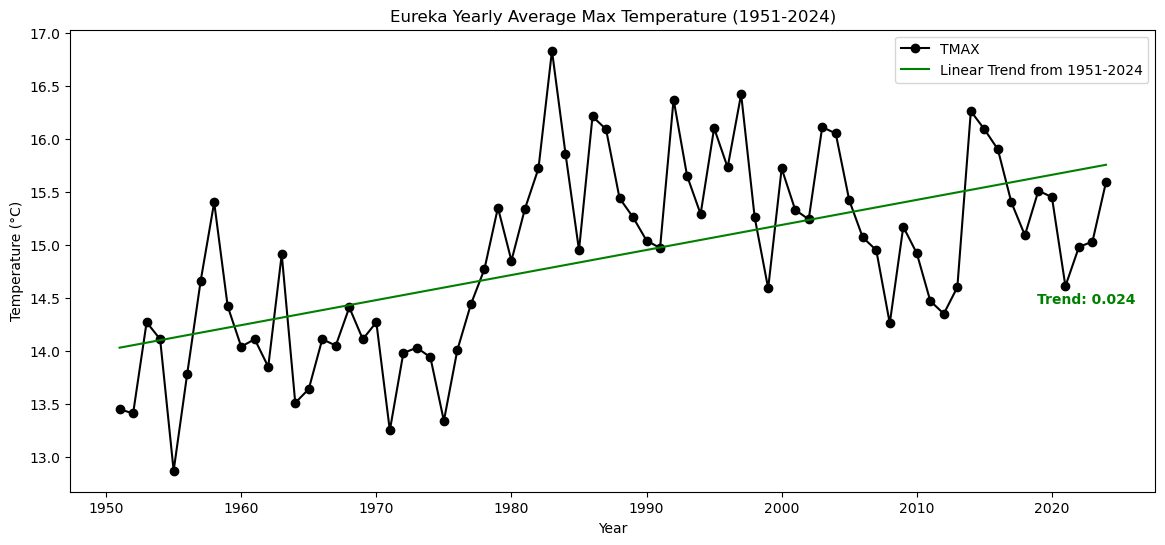

In [167]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, EUtmax, 'k-o', label='TMAX')
TMAX_ltl(EU, 1951, 2024, 'green')
plt.title('Eureka Yearly Average Max Temperature (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# **Yearly Precipitation Totals**

### Graphs and Trends

In [170]:
SDptrends = {}
SFptrends = {}
EUptrends = {}
for start, end in [(1951, 2024)]:
    SDp_Trend = PRCP_Trend(SD, start, end)
    SFp_Trend = PRCP_Trend(SF, start, end)
    EUp_Trend = PRCP_Trend(EU, start, end)
    SDptrends[f'{start}-{end}'] = SDp_Trend
    SFptrends[f'{start}-{end}'] = SFp_Trend
    EUptrends[f'{start}-{end}'] = EUp_Trend
for period, trend in SDptrends.items():
  print(f'Temporal trend of Precipitation in San Diego per decade for {period}: {trend:.4f} °C per year')
for period, trend in SFptrends.items():
  print(f'Temporal trend of Precipitation in San Francisco per decade for {period}: {trend:.4f} °C per year')
for period, trend in EUptrends.items():
  print(f'Temporal trend of Precipitation in Eureka per decade for {period}: {trend:.4f} °C per year')

Temporal trend of Precipitation in San Diego per decade for 1951-2024: 0.1848 °C per year
Temporal trend of Precipitation in San Francisco per decade for 1951-2024: -0.5356 °C per year
Temporal trend of Precipitation in Eureka per decade for 1951-2024: 0.0951 °C per year


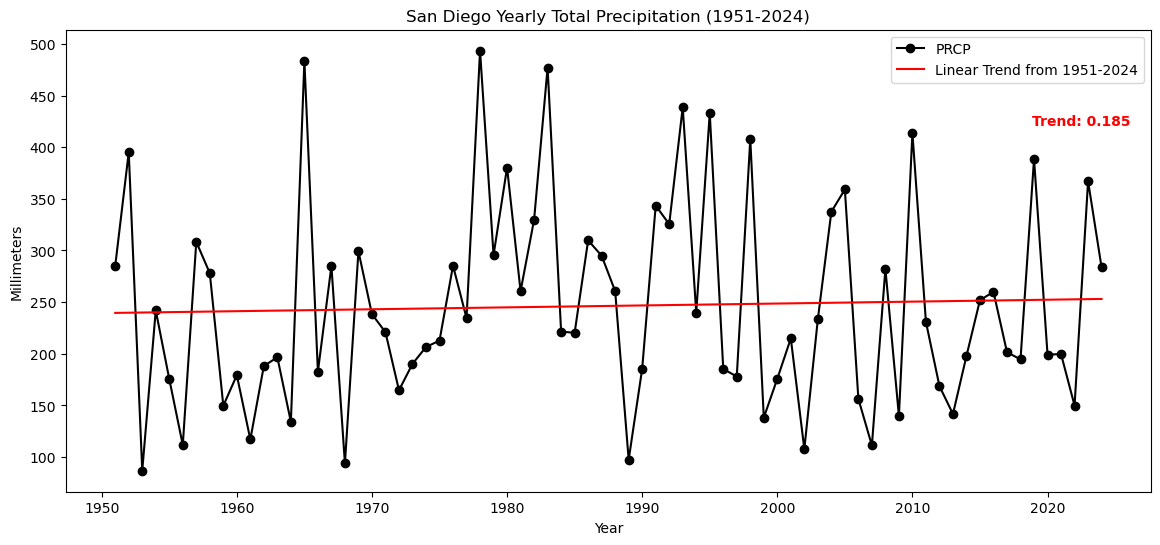

In [172]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SDprcp, 'k-o', label='PRCP')
PRCP_ltl(SD, 1951, 2024, 'red')
plt.title('San Diego Yearly Total Precipitation (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Millimeters')
plt.legend()
plt.show()

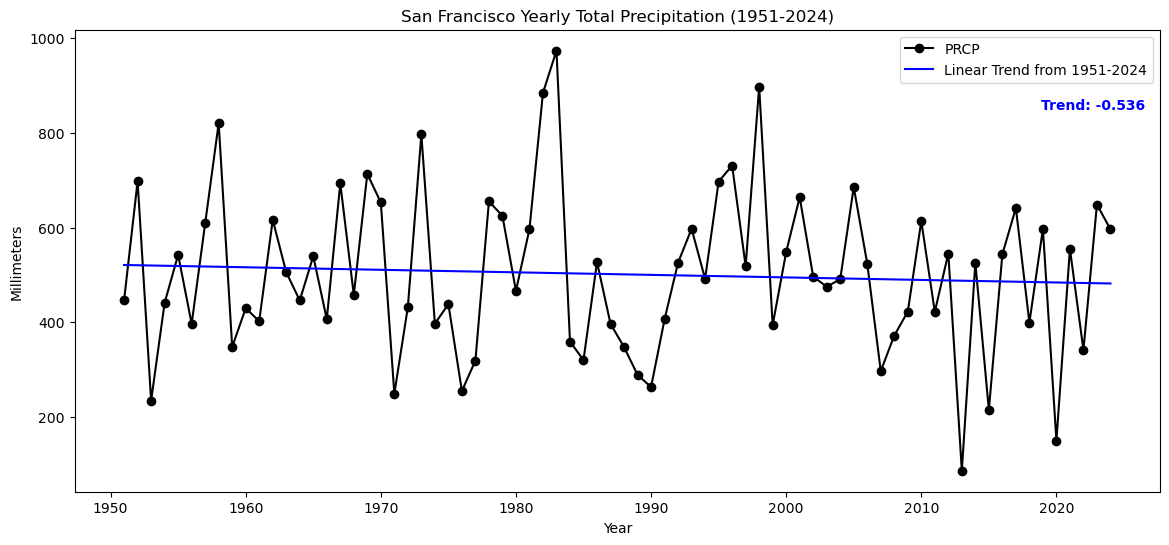

In [173]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, SFprcp, 'k-o', label='PRCP')
PRCP_ltl(SF, 1951, 2024, 'blue')
plt.title('San Francisco Yearly Total Precipitation (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Millimeters')
plt.legend()
plt.show()

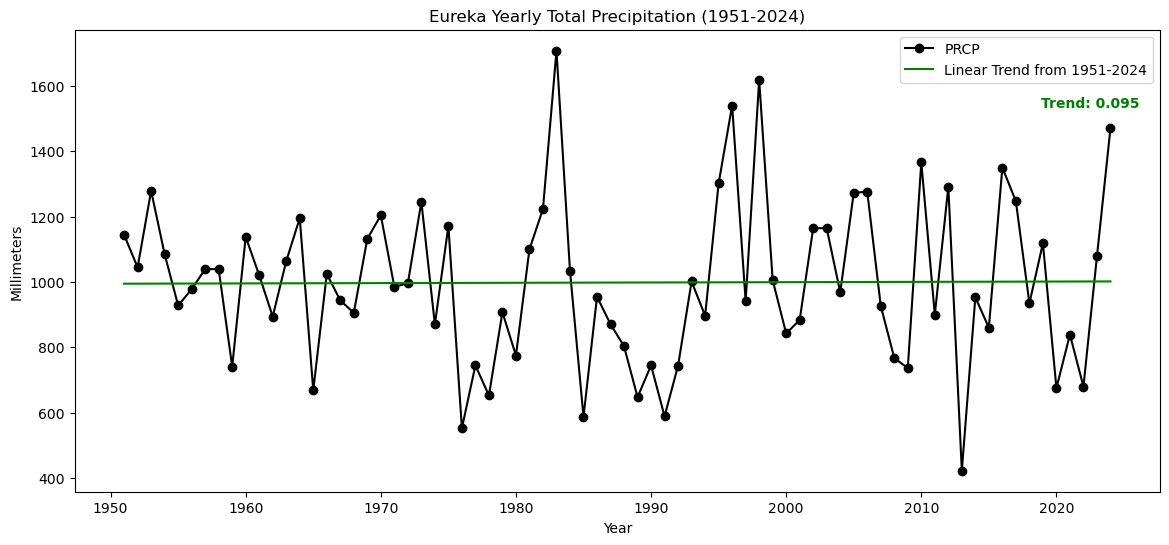

In [176]:
YEARS = np.linspace(1951, 2024, 74)
plt.figure(figsize=(14, 6))
plt.plot(YEARS, EUprcp, 'k-o', label='PRCP')
PRCP_ltl(EU, 1951, 2024, 'green')
plt.title('Eureka Yearly Total Precipitation (1951-2024)')
plt.xlabel('Year')
plt.ylabel('Millimeters')
plt.legend()
plt.show()

# **Carbon Emissions Data**

Sources:

California Air Resources Board, "Current California GHG Emission Inventory Data 2000–2022," 2024. [Online]. Available: https://ww2.arb.ca.gov/ghg-inventory-data

Slope: -5.165, Intercept: 10826.822


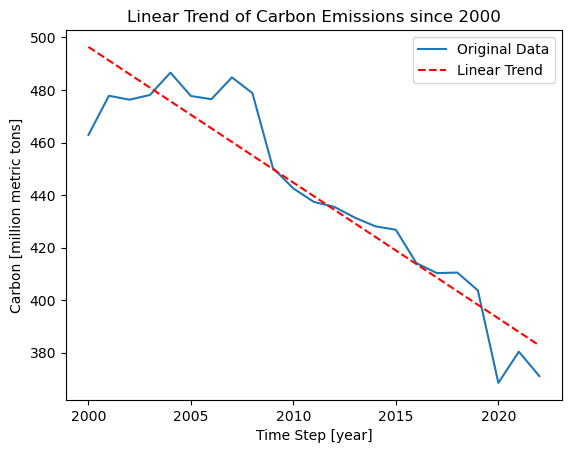

In [180]:
Carbon = pd.read_csv(
    "co2_emission_data.csv",
    header=None,
    skiprows=4,
    nrows=2,
    encoding="windows-1252"
)

Carbon = Carbon.iloc[:, 2:]
years = Carbon.iloc[0, :].to_numpy()
coDat = Carbon.iloc[1, :].to_numpy()

slope, intercept = np.polyfit(years, coDat, 1)

trend_line = slope * years + intercept

print(f"Slope: {slope:.3f}, Intercept: {intercept:.3f}")

# Optional: plot the result
plt.plot(years, coDat, label='Original Data')
plt.plot(years, trend_line, color='red', linestyle='--', label='Linear Trend')
plt.xlabel('Time Step [year]')
plt.ylabel('Carbon [million metric tons]')
plt.legend()
plt.title('Linear Trend of Carbon Emissions since 2000')
plt.show()